<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Model_Selection_and_Boosting/k_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Fold Cross Validation

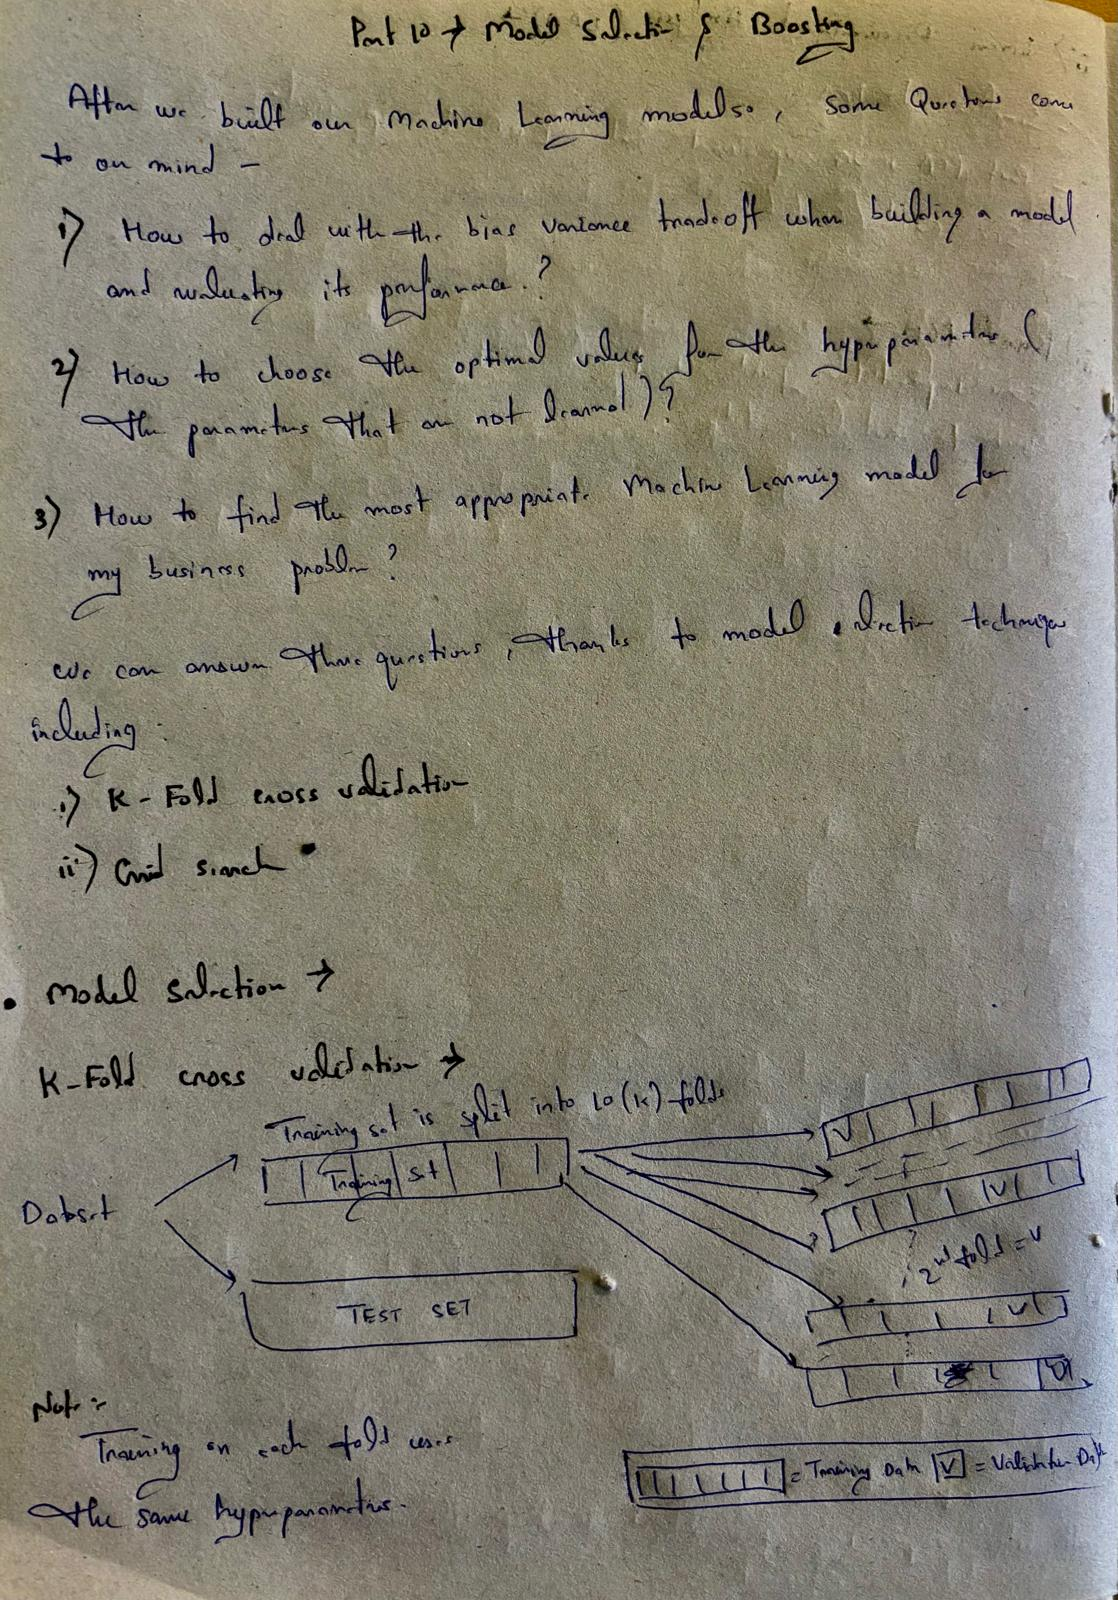

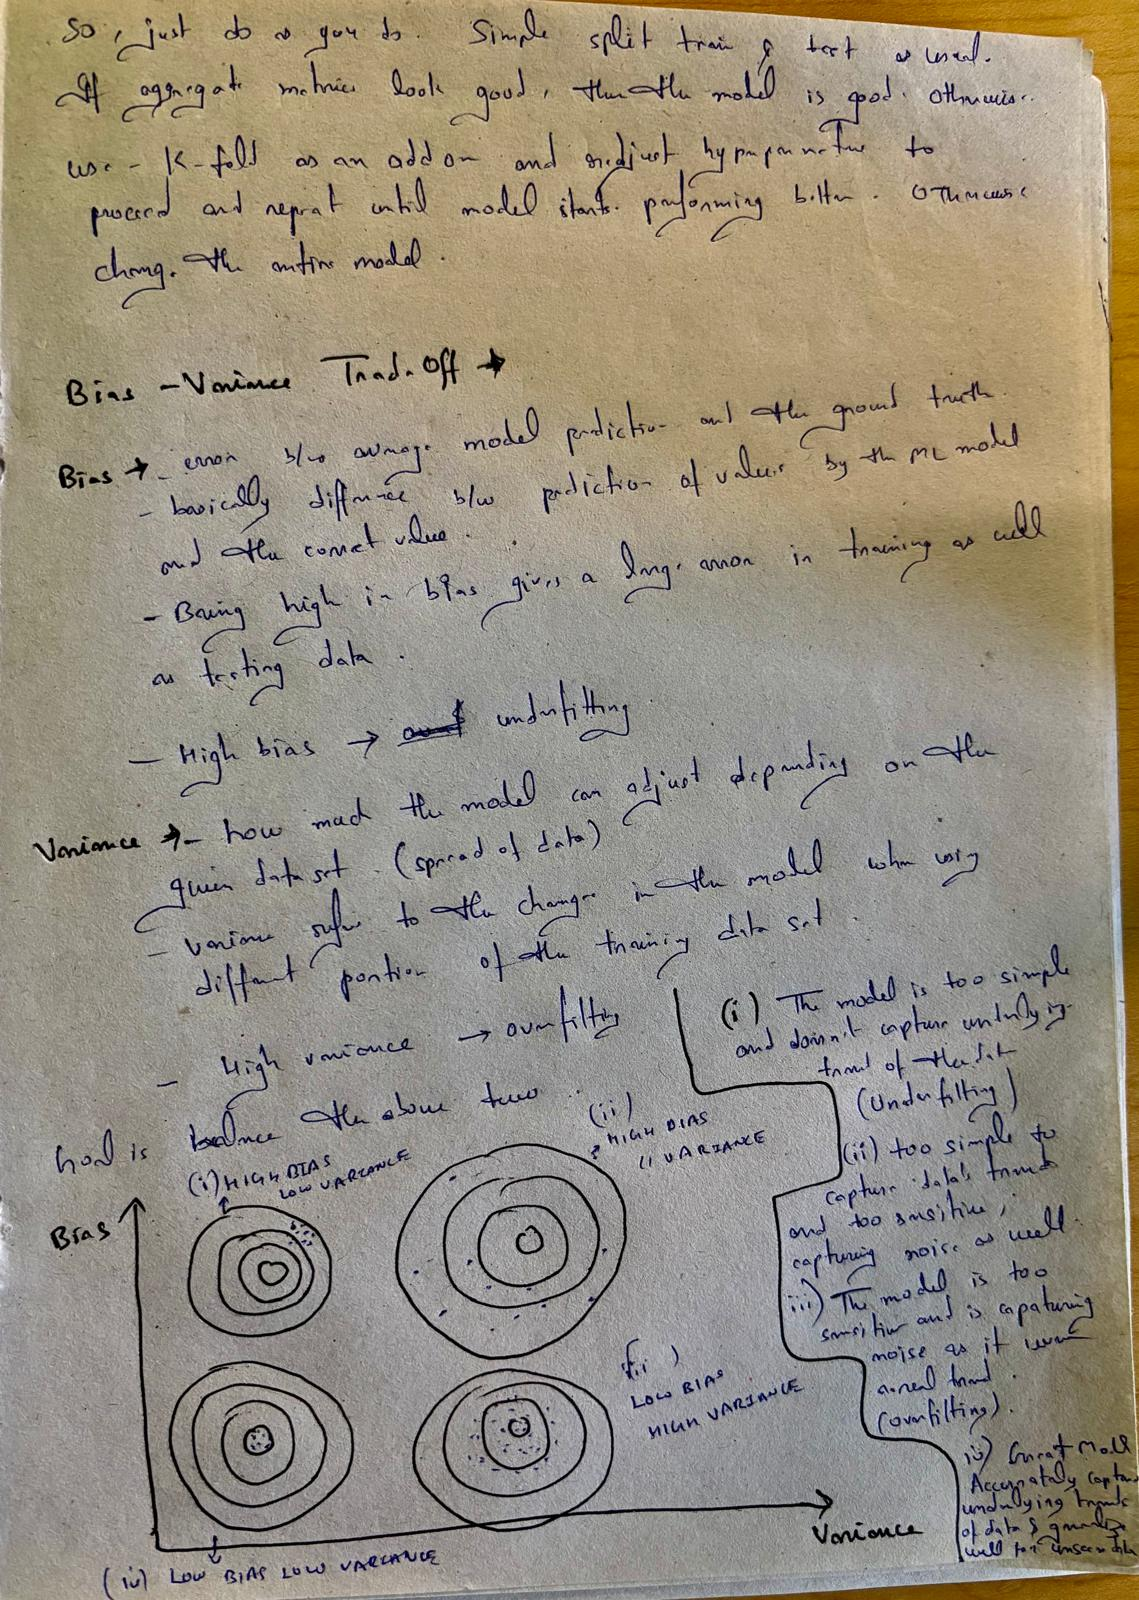

Great! Let’s break down **K-Fold Cross Validation** — a powerful technique for **reliably evaluating machine learning models**.

---

## 🧪 What is K-Fold Cross Validation?

> **K-Fold Cross Validation** is a technique that splits the data into **K equal parts (folds)**.
> Each fold gets a chance to be the **test set once**, and the **model is trained on the remaining K-1 folds**.

---

### 📊 How it Works (Example: K = 5)

1. Split your dataset into 5 equal parts.
2. For each of the 5 iterations:

   * Use 4 folds for training
   * Use the remaining 1 fold for testing
3. Repeat this process **K times**, each time using a different fold for testing.
4. At the end, **average the performance scores**.

---

### 📈 Why Use It?

* ✅ Reduces **variance** compared to a single train/test split.
* ✅ Gives a **more reliable estimate** of model performance.
* ✅ Helps **detect overfitting**.

---

## 🔁 Diagram

```
Iteration 1:  [Train][Train][Train][Train][Test]
Iteration 2:  [Train][Train][Train][Test][Train]
Iteration 3:  [Train][Train][Test][Train][Train]
... and so on
```

---

## ✅ Code Example (Scikit-Learn)

```python
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv=5)  # 5-Fold CV
print("Accuracy per fold:", scores)
print("Average accuracy:", scores.mean())
```

---

## 🧠 Tips:

| When to Use                               | Notes                           |
| ----------------------------------------- | ------------------------------- |
| Small dataset                             | Helps use all data effectively  |
| Hyperparameter tuning (with GridSearchCV) | Avoids overfitting on one split |
| Nested CV                                 | Tune hyperparameters + evaluate |

---

## Variants:

| Variant             | Description                                 |
| ------------------- | ------------------------------------------- |
| Stratified K-Fold   | Keeps class proportions same in each fold   |
| Leave-One-Out (LOO) | K = n (very slow, but thorough)             |
| Repeated K-Fold     | Repeat CV multiple times for more stability |

---

#thats validation data coming from subset of training data right? different from our original test dataset ??

Exactly, you're absolutely right! ✅
Let me clarify the distinction clearly for you:

---

## 🔍 In **K-Fold Cross Validation**:

* The **original training data** is split into K folds.
* **No part of the actual test set is touched** during this process.
* It is purely for **model selection, tuning, and internal evaluation**.

---

### 📁 Data Split Overview

```
Original Dataset → [Training Set] + [Test Set (held out for final evaluation)]

Training Set → used in K-Fold CV like this:
  Fold 1: Train on Folds 2–5, Validate on Fold 1
  Fold 2: Train on Folds 1,3,4,5, Validate on Fold 2
  ...
```

* ✅ **K-Fold validation set** is a subset of training data.
* ✅ The **Test Set** is kept **completely separate** until final evaluation.

---

### 📌 Purpose of Each

| Set                 | Used For                                          |
| ------------------- | ------------------------------------------------- |
| **Training Folds**  | Training the model                                |
| **Validation Fold** | Testing during CV to tune or compare models       |
| **Test Set**        | Final unbiased evaluation (real-world simulation) |

---

## 🧠 Why This Matters

* If you tune hyperparameters using K-Fold CV, you must evaluate your **final model on the real test set**.
* This avoids **data leakage** and ensures your model generalizes well.

---

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Applying k-Fold Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


## Visualising the Training set results

/tmp/ipython-input-8-2325164593.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


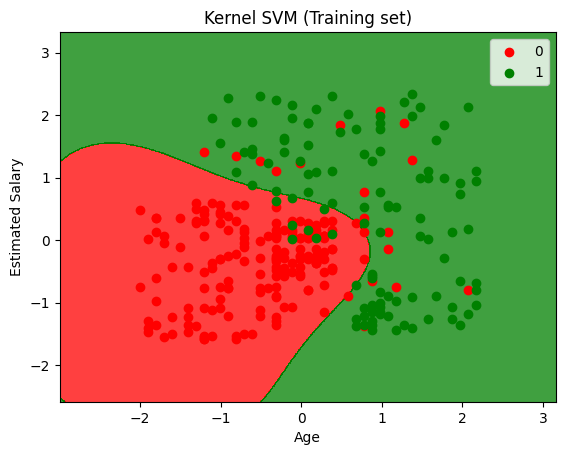

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

/tmp/ipython-input-9-493352116.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


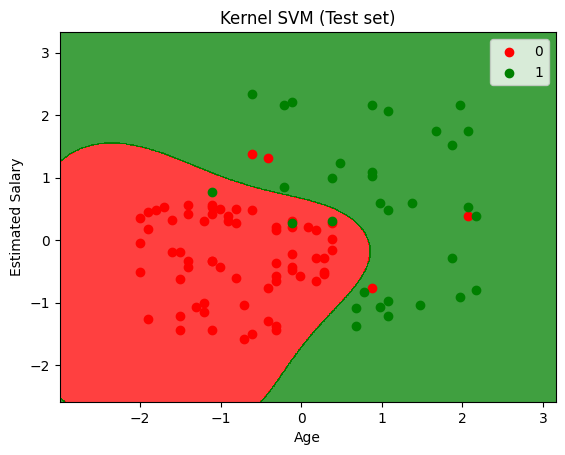

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#Question: After we built our Machine Learning models, some questions remained unanswered:

1. How to deal with the bias variance tradeoff when building a model and evaluating its performance ?
2. How to choose the optimal values for the hyperparameters (the parameters that are not learned) ?
3. How to find the most appropriate Machine Learning model for my business problem ?

These are excellent questions that hit the **core of practical machine learning**. Let’s tackle them one by one in a structured, actionable way.

---

## 🔁 1. **Bias-Variance Tradeoff: How to Handle It**

| Concept    | Bias                                     | Variance                     |
| ---------- | ---------------------------------------- | ---------------------------- |
| Definition | Error due to **underfitting**            | Error due to **overfitting** |
| Symptom    | Model too simple                         | Model too complex            |
| Goal       | **Balance** both to minimize total error |                              |

### ✅ How to Deal With It:

* **Train/Validation Split**: Use validation set to detect overfitting.
* **Cross-Validation (CV)**: Helps get a robust estimate of generalization.
* **Simplify or Complexify the Model**:

  * High variance? → Try **regularization** (Ridge, Lasso, Dropout)
  * High bias? → Try **more complex model**, add features, or reduce regularization
* **Use Learning Curves**: Plot train vs. validation error to visually diagnose under/overfitting.

---

## ⚙️ 2. **Choosing Optimal Hyperparameters**

These are parameters **not learned** from data but set **before training**, e.g.:

* `k` in KNN
* `C`, `gamma` in SVM
* `n_estimators`, `max_depth` in Random Forests

### 🔍 How to Tune Them:

| Technique                 | Description                                                         |
| ------------------------- | ------------------------------------------------------------------- |
| **Grid Search**           | Try all combinations (can be slow)                                  |
| **Random Search**         | Try random combinations (faster, surprisingly effective)            |
| **Bayesian Optimization** | Probabilistically select best next options (e.g., Optuna, HyperOpt) |
| **Cross-Validation**      | Combine with tuning to validate performance across folds            |

```python
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
```

---

## 🧠 3. **Choosing the Right Model for Your Business Problem**

This is where **domain knowledge + experimentation** come together.

### ✅ Ask These Questions:

1. **What is the problem type?**

   * Classification? → Logistic Regression, SVM, RF, XGBoost
   * Regression? → Linear/Polynomial, SVR, Gradient Boosting
   * Clustering? → KMeans, DBSCAN, Hierarchical
   * NLP? → Naive Bayes, Transformers
   * Images? → CNNs

2. **Do you have labels?**

   * **Yes** → Supervised ML
   * **No** → Unsupervised ML

3. **Data size & quality?**

   * Low data → Simpler models (Logistic, SVM)
   * High-dimensional → Regularization or PCA
   * Big data → Tree-based models (RF, XGBoost), deep learning

4. **Interpretability vs Accuracy?**

   * Need explainability? → Logistic Regression, Decision Trees
   * Need high performance? → XGBoost, Deep Learning

5. **Real-world Constraints?**

   * Time, memory, latency (e.g., mobile app vs batch prediction)

---

## 🔁 Final Workflow Summary

1. **Start simple** → Benchmark with Logistic Regression or Decision Tree
2. **Split data** (Train/Validation/Test)
3. **Try multiple models**
4. **Tune hyperparameters with CV**
5. **Evaluate using multiple metrics (accuracy, F1, ROC, etc.)**
6. **Track experiments** (e.g., with MLflow or Weights & Biases)
7. **Deploy & monitor**

---
